In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, balanced_accuracy_score,
                             matthews_corrcoef)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the dataset
data = pd.read_csv('/content/Crop_Recommendation.csv')

# Display basic information
print(data.info())
print(data.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.1301

In [ ]:
print(data.isnull().sum())


Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [ ]:
# Select only numerical columns for outlier detection
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Calculate IQR for numerical features
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) |
              (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(data.shape)


(1768, 8)


In [ ]:
le = LabelEncoder()
data['Crop'] = le.fit_transform(data['Crop'])
print(data['Crop'].unique())  # Check encoded classes


[18  9  2  7 16 11 12  1  8 17  0 10 19 13 14 15  3  5  6  4]


In [ ]:
scaler = StandardScaler()
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
data[features] = scaler.fit_transform(data[features])
print(data.head())


    Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
0   0.928231   -0.126033   0.718184    -1.189446  0.545039  0.030913   
13  1.006304    0.492928   0.272680    -0.437164  0.547521  0.737749   
14  1.032328    0.227659   0.336323    -0.041045  0.483656  0.684397   
17  0.954255   -0.435513   0.463610    -0.490205  0.472392  0.717935   
20  0.902207    0.006602   0.272680    -1.082599  0.474987 -0.057939   

    Rainfall  Crop  
0   2.174235    18  
13  1.808354    18  
14  2.312053    18  
17  2.243143    18  
20  1.812915    18  


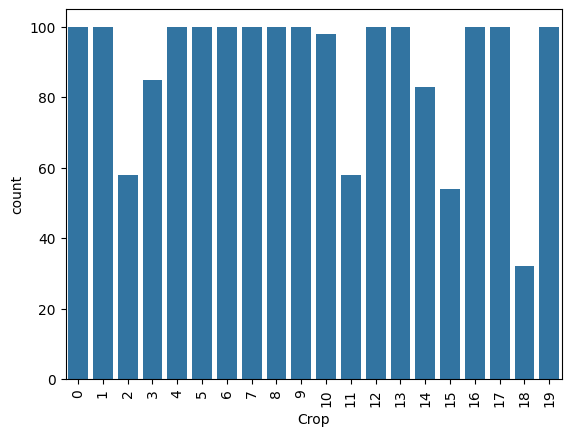

In [ ]:
sns.countplot(x='Crop', data=data)
plt.xticks(rotation=90)
plt.show()


In [ ]:

X = data.drop('Crop', axis=1)

y = data['Crop']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())


Crop
18    100
9     100
2     100
7     100
16    100
11    100
12    100
1     100
8     100
17    100
0     100
10    100
19    100
13    100
14    100
15    100
3     100
5     100
6     100
4     100
Name: count, dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Convert metrics to percentages
    accuracy = accuracy_score(y_test, y_pred) * 100
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred) * 100
    mcc = matthews_corrcoef(y_test, y_pred) * 100

    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Accuracy: 99.00%
Balanced Accuracy: 99.06%
Matthews Correlation Coefficient (MCC): 98.9468

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        26
           6       0.96      0.92      0.94        24
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        14
           9       0.96      1.00      0.98        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        18
          15       

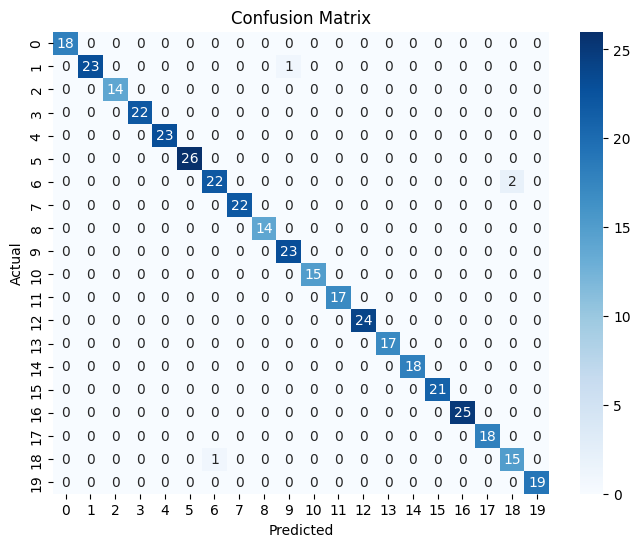

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(rf_model, X_test, y_test)


Accuracy: 99.00%
Balanced Accuracy: 99.17%
Matthews Correlation Coefficient (MCC): 98.9494

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        23
           5       0.96      1.00      0.98        26
           6       1.00      0.92      0.96        24
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        14
           9       1.00      0.96      0.98        23
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        18
          15       

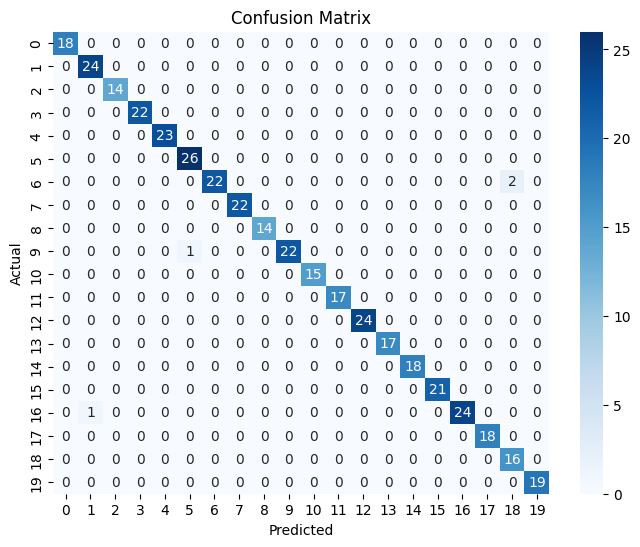

In [ ]:
from xgboost import XGBClassifier

# Initialize and train model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(xgb_model, X_test, y_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 7
[LightGBM] [Info] Start training from score -2.971040
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -2.923412
[LightGBM] [Info] Start training from score -3.021050
[LightGBM] [Info] Start training from score -3.033953
[LightGBM] [Info] Start training from score -3.073694
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -3.021050
[LightGBM] [Info] Start training from score -2.923412
[LightGBM] [Info] Start training from score -3.033953
[LightGBM] [Info] Start training from score -2.935108
[LightGBM] [Info] Start training from score -2.958918
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] 

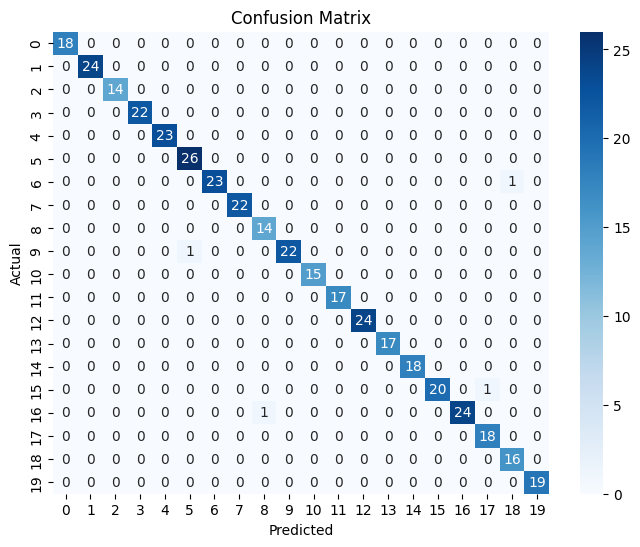

In [ ]:
from lightgbm import LGBMClassifier

# Initialize and train model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(lgbm_model, X_test, y_test)


Accuracy: 96.50%
Balanced Accuracy: 96.80%
Matthews Correlation Coefficient (MCC): 96.3364

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        22
           4       0.96      1.00      0.98        23
           5       0.93      1.00      0.96        26
           6       0.94      0.71      0.81        24
           7       1.00      1.00      1.00        22
           8       0.82      1.00      0.90        14
           9       1.00      0.91      0.95        23
          10       1.00      1.00      1.00        15
          11       0.94      0.88      0.91        17
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        18
          15       

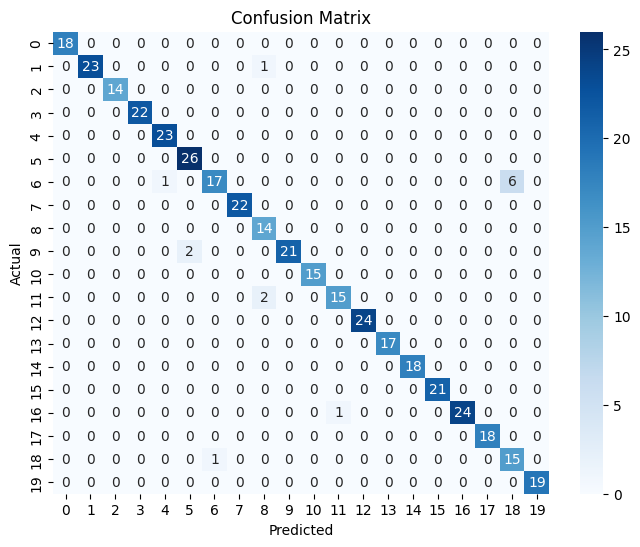

In [ ]:
from sklearn.svm import SVC

# Initialize and train model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(svm_model, X_test, y_test)


Accuracy: 96.00%
Balanced Accuracy: 96.32%
Matthews Correlation Coefficient (MCC): 95.8029

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.96      0.96      0.96        24
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        22
           4       0.96      1.00      0.98        23
           5       0.93      1.00      0.96        26
           6       0.95      0.79      0.86        24
           7       0.96      1.00      0.98        22
           8       0.82      1.00      0.90        14
           9       1.00      0.91      0.95        23
          10       0.94      1.00      0.97        15
          11       0.88      0.82      0.85        17
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        18
          15       

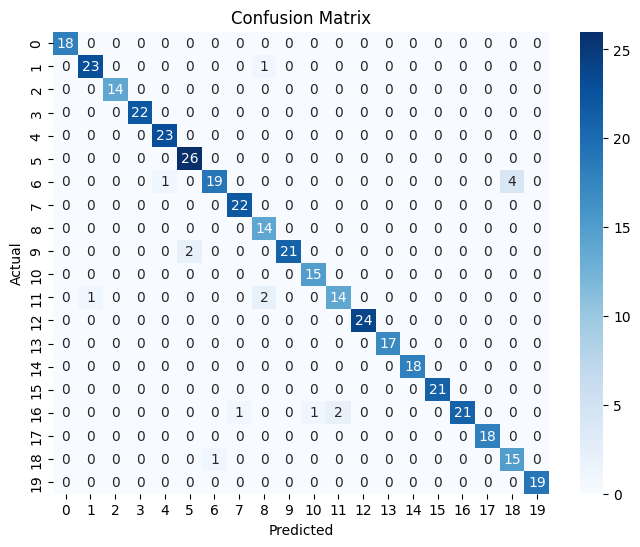

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(knn_model, X_test, y_test)


Accuracy: 98.00%
Balanced Accuracy: 98.14%
Matthews Correlation Coefficient (MCC): 97.8963

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        22
           4       0.96      1.00      0.98        23
           5       0.96      1.00      0.98        26
           6       0.95      0.88      0.91        24
           7       0.96      1.00      0.98        22
           8       0.88      1.00      0.93        14
           9       1.00      0.96      0.98        23
          10       1.00      1.00      1.00        15
          11       1.00      0.94      0.97        17
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        18
          15       

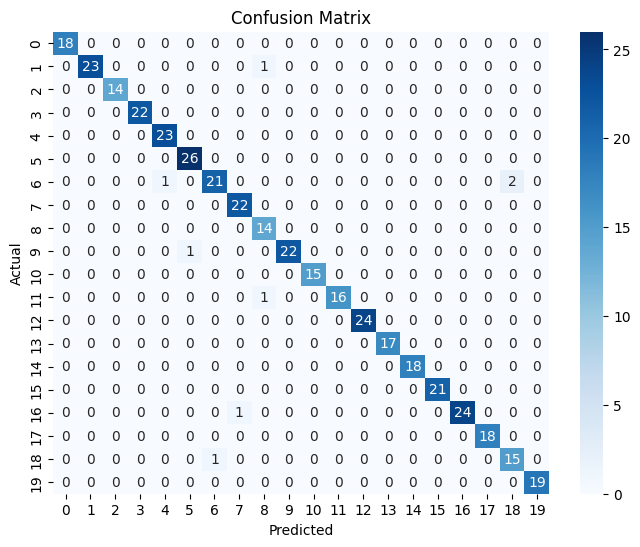

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                          max_iter=300, random_state=42)

mlp_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(mlp_model, X_test, y_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 7
[LightGBM] [Info] Start training from score -2.971040
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -2.923412
[LightGBM] [Info] Start training from score -3.021050
[LightGBM] [Info] Start training from score -3.033953
[LightGBM] [Info] Start training from score -3.073694
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] [Info] Start training from score -3.021050
[LightGBM] [Info] Start training from score -2.923412
[LightGBM] [Info] Start training from score -3.033953
[LightGBM] [Info] Start training from score -2.935108
[LightGBM] [Info] Start training from score -2.958918
[LightGBM] [Info] Start training from score -3.047026
[LightGBM] 

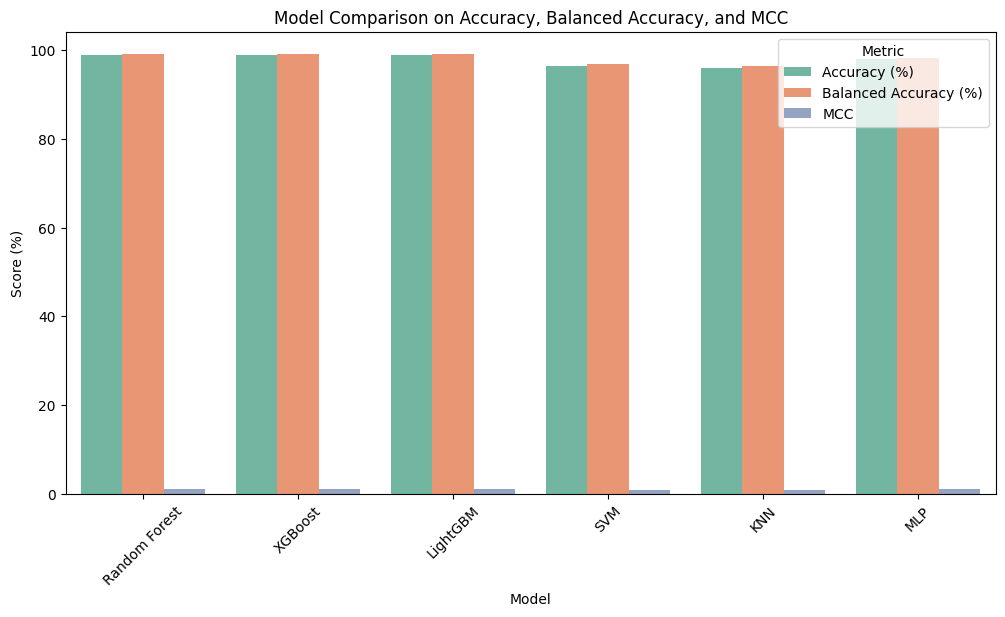

In [ ]:
def evaluate_and_store_metrics(model, model_name, metrics_list):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_list.append({
        'Model': model_name,
        'Accuracy (%)': accuracy_score(y_test, y_pred) * 100,
        'Balanced Accuracy (%)': balanced_accuracy_score(y_test, y_pred) * 100,
        'MCC': matthews_corrcoef(y_test, y_pred)
    })

# List to store all metrics
metrics_list = []

# Define all models
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (XGBClassifier(random_state=42), "XGBoost"),
    (LGBMClassifier(random_state=42), "LightGBM"),
    (SVC(), "SVM"),
    (KNeighborsClassifier(), "KNN"),
    (MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42), "MLP")
]

# Evaluate each model
for model, name in models:
    evaluate_and_store_metrics(model, name, metrics_list)

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame(metrics_list)

# Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting the comparison graph
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Model Comparison on Accuracy, Balanced Accuracy, and MCC')
plt.ylabel('Score (%)')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

In [ ]:
import pickle

# List of models and their names
models = [
    (rf_model, "random_forest.pkl"),
    (xgb_model, "xgboost.pkl"),
    (lgbm_model, "lightgbm.pkl"),
    (svm_model, "svm.pkl"),
    (knn_model, "knn.pkl"),
    (mlp_model, "mlp.pkl")
]

# Save models to disk
for model, filename in models:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

print("Models saved successfully!")


Models saved successfully!


In [ ]:
!pip install flask-ngrok
!pip install pyngrok
!ngrok authtoken 2o1PVSrtWV35p8mAYGNj5unkwL6_3zbEqpUv37ehhc5bV9F8H

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!mkdir -p templates static


In [ ]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Soil and Weather Based Crop Yield Prediction</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500;700&display=swap" rel="stylesheet">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css">
</head>
<body>
    <div class="container">
        <div class="header">
            <h2><i class="fas fa-seedling"></i> Soil and Weather Based Crop Yield Prediction</h2>
            <p>Enter soil and climate details to get the best crop recommendation</p>
        </div>

        <form action="/predict" method="POST" id="predictionForm">
            <div class="form-group">
                <label for="N"><i class="fas fa-flask"></i> Nitrogen (N):</label>
                <input type="number" name="N" id="N" step="any" required placeholder="e.g., 90">
            </div>

            <div class="form-group">
                <label for="P"><i class="fas fa-flask"></i> Phosphorus (P):</label>
                <input type="number" name="P" id="P" step="any" required placeholder="e.g., 40">
            </div>

            <div class="form-group">
                <label for="K"><i class="fas fa-flask"></i> Potassium (K):</label>
                <input type="number" name="K" id="K" step="any" required placeholder="e.g., 40">
            </div>

            <div class="form-group">
                <label for="temperature"><i class="fas fa-temperature-high"></i> Temperature (°C):</label>
                <input type="number" name="temperature" id="temperature" step="any" required placeholder="e.g., 25">
            </div>

            <div class="form-group">
                <label for="humidity"><i class="fas fa-tint"></i> Humidity (%):</label>
                <input type="number" name="humidity" id="humidity" step="any" required placeholder="e.g., 80">
            </div>

            <div class="form-group">
                <label for="ph"><i class="fas fa-vial"></i> pH:</label>
                <input type="number" name="ph" id="ph" step="any" required placeholder="e.g., 6.5">
            </div>

            <div class="form-group">
                <label for="rainfall"><i class="fas fa-cloud-rain"></i> Rainfall (mm):</label>
                <input type="number" name="rainfall" id="rainfall" step="any" required placeholder="e.g., 200">
            </div>

            <div class="form-group">
                <label for="model"><i class="fas fa-brain"></i> Select Model:</label>
                <select name="model" id="model" required>
                    {% for model in models %}
                        <option value="{{ model }}">{{ model }}</option>
                    {% endfor %}
                </select>
            </div>

            <div class="loading" id="loading"></div>
            <button type="submit" id="submitBtn"><i class="fas fa-search"></i> Predict Best Crop</button>
        </form>

        <div class="team-members">
            <h3><i class="fas fa-users"></i> Team Members</h3>
            <p class="member">RA2211003011436-Yetukuri Gargeya Sreenadh</p>
            <p class="member">RA2211003011437-Kodumuru Ashish</p>
            <p class="member">RA2211003011440-Pabolu Hari Venkata Mani Sai Vineeth</p>
            <p class="member">RA2211003011422-Mohd Tahir Majid</p>
        </div>
    </div>

    <script>
        document.getElementById('predictionForm').addEventListener('submit', function() {
            document.getElementById('loading').style.display = 'block';
            document.getElementById('submitBtn').disabled = true;
            document.getElementById('submitBtn').innerHTML = 'Processing...';
        });
    </script>
</body>
</html>

Overwriting templates/index.html


In [ ]:
%%writefile templates/result.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Soil and Weather Based Crop Yield Prediction - Result</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='styles.css') }}">
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500;700&display=swap" rel="stylesheet">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css">
</head>
<body>
    <div class="container">
        <div class="header">
            <h2><i class="fas fa-chart-pie"></i> Prediction Result</h2>
            <p>Based on your soil and weather conditions</p>
        </div>

        <div class="result-card">
            <h3>Analysis Complete</h3>

            <div class="result-item">
                <p class="result-label"><i class="fas fa-seedling crop-icon"></i> Recommended Crop:</p>
                <p class="result-value">{{ crop }}</p>
            </div>

            <div class="result-item">
                <p class="result-label"><i class="fas fa-balance-scale yield-icon"></i> Expected Yield:</p>
                <p class="result-value">{{ yield_data }}</p>
            </div>

            <div id="cropInfo">
                <!-- Dynamically inserted crop information -->
                <script>
                    const cropInfo = {
                        'rice': 'Rice thrives in warm, humid conditions with abundant water.',
                        'maize': 'Maize grows best in well-drained soils with moderate fertility.',
                        'jute': 'Jute requires high humidity and warm temperatures to flourish.',
                        'cotton': 'Cotton prefers hot weather and at least 180 frost-free days.',
                        'coconut': 'Coconut palms thrive in tropical coastal regions with sandy soil.',
                        'papaya': 'Papaya needs well-drained soil and protection from strong winds.',
                        'orange': 'Oranges do best in subtropical climates with moderate rainfall.',
                        'apple': 'Apples need a period of winter chill for proper flowering.',
                        'muskmelon': 'Muskmelons require warm temperatures and moderate humidity.',
                        'watermelon': 'Watermelons need full sun and warm growing conditions.',
                        'grapes': 'Grapes thrive in areas with long, warm summers and mild winters.',
                        'mango': 'Mangoes prefer tropical climate with distinct wet and dry seasons.',
                        'banana': 'Bananas need constant warmth and protection from strong winds.',
                        'pomegranate': 'Pomegranates are drought-tolerant once established.',
                        'lentil': 'Lentils are cool-season crops that need well-drained soil.',
                        'blackgram': 'Blackgram is drought-resistant and grows in various soil types.',
                        'mungbean': 'Mungbean is hardy and can grow in a range of soil conditions.',
                        'mothbeans': 'Mothbeans are extremely drought-tolerant legumes.',
                        'pigeonpeas': 'Pigeonpeas are deep-rooted and can withstand dry periods.',
                        'kidneybeans': 'Kidneybeans need warm soil and cannot tolerate frost.',
                        'chickpea': 'Chickpeas prefer cool, dry growing conditions.',
                        'coffee': 'Coffee thrives in tropical highlands with rich, well-drained soil.'
                    };

                    const cropName = "{{ crop }}".toLowerCase();
                    if (cropInfo[cropName]) {
                        const infoDiv = document.createElement('div');
                        infoDiv.innerHTML = `
                            <p class="result-label"><i class="fas fa-info-circle"></i> Growing Conditions:</p>
                            <p>${cropInfo[cropName]}</p>
                        `;
                        document.getElementById('cropInfo').appendChild(infoDiv);
                    }
                </script>
            </div>
        </div>

        <a href="/" class="back-link"><i class="fas fa-arrow-left"></i> Predict Again</a>

        <div class="team-members">
            <h3><i class="fas fa-users"></i> Team Members</h3>
            <p class="member">RA2211003011436-Yetukuri Gargeya Sreenadh</p>
            <p class="member">RA2211003011437-Kodumuru Ashish</p>
            <p class="member">RA2211003011440-Pabolu Hari Venkata Mani Sai Vineeth</p>
            <p class="member">RA2211003011422-Mohd Tahir Majid</p>
        </div>
    </div>
</body>
</html>

Overwriting templates/result.html


In [ ]:
%%writefile static/styles.css
body {
    font-family: 'Roboto', Arial, sans-serif;
    background-color: #1a1a1a;
    color: #e0e0e0;
    margin: 0;
    padding: 0;
    min-height: 100vh;
    display: flex;
    justify-content: center;
    align-items: center;
    background-image: linear-gradient(to bottom right, #222, #111);
}

.container {
    width: 80%;
    max-width: 800px;
    margin: 30px auto;
    padding: 30px;
    background-color: #2b2b2b;
    border-radius: 15px;
    box-shadow: 0 10px 25px rgba(0,0,0,0.5);
    animation: fadeIn 0.5s ease-in;
}

.header {
    margin-bottom: 30px;
    position: relative;
    padding-bottom: 15px;
}

.header:after {
    content: '';
    position: absolute;
    bottom: 0;
    left: 25%;
    width: 50%;
    height: 3px;
    background: linear-gradient(to right, #388e3c, #4CAF50, #388e3c);
}

.form-group {
    margin-bottom: 20px;
    text-align: left;
}

label {
    display: block;
    margin-bottom: 8px;
    font-weight: 500;
    color: #bbb;
}

input, select {
    width: 100%;
    padding: 12px 15px;
    border: 2px solid #444;
    border-radius: 8px;
    background-color: #333;
    color: #e0e0e0;
    font-size: 16px;
    transition: all 0.3s ease;
    box-sizing: border-box;
}

input:focus, select:focus {
    border-color: #4CAF50;
    box-shadow: 0 0 8px rgba(76, 175, 80, 0.6);
    outline: none;
}

button {
    background: linear-gradient(to right, #388e3c, #4CAF50);
    color: white;
    border: none;
    padding: 14px 20px;
    margin-top: 20px;
    border-radius: 8px;
    cursor: pointer;
    font-size: 16px;
    font-weight: bold;
    width: 100%;
    transition: all 0.3s ease;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
}

button:hover {
    background: linear-gradient(to right, #2e7d32, #388e3c);
    transform: translateY(-2px);
    box-shadow: 0 6px 10px rgba(0,0,0,0.2);
}

button:active {
    transform: translateY(0);
}

a {
    color: #4CAF50;
    text-decoration: none;
    font-weight: bold;
    transition: all 0.3s ease;
    display: inline-block;
    margin-top: 20px;
    padding: 10px 20px;
    border: 2px solid #4CAF50;
    border-radius: 8px;
}

a:hover {
    background-color: #4CAF50;
    color: white;
    transform: translateY(-2px);
}

.result-card {
    background-color: #333;
    border-radius: 12px;
    padding: 25px;
    margin: 30px 0;
    box-shadow: 0 6px 12px rgba(0,0,0,0.2);
    text-align: left;
}

.result-card h3 {
    margin-top: 0;
    color: #4CAF50;
    border-bottom: 1px solid #444;
    padding-bottom: 10px;
}

.result-label {
    font-weight: bold;
    color: #aaa;
}

.result-value {
    font-size: 24px;
    color: #fff;
    margin: 5px 0 20px 0;
}

.yield-icon, .crop-icon {
    font-size: 24px;
    margin-right: 10px;
    vertical-align: middle;
}

/* Loading animation */
.loading {
    display: none;
    width: 50px;
    height: 50px;
    border: 5px solid #333;
    border-top: 5px solid #4CAF50;
    border-radius: 50%;
    margin: 20px auto;
    animation: spin 1s linear infinite;
}

.team-members {
    margin-top: 30px;
    padding-top: 20px;
    border-top: 1px solid #444;
    text-align: center;
}

.team-members h3 {
    color: #4CAF50;
    margin-bottom: 15px;
}

.member {
    margin: 8px 0;
    color: #bbb;
}

@keyframes spin {
    0% { transform: rotate(0deg); }
    100% { transform: rotate(360deg); }
}

@keyframes fadeIn {
    from { opacity: 0; transform: translateY(20px); }
    to { opacity: 1; transform: translateY(0); }
}

/* Responsive design */
@media (max-width: 768px) {
    .container {
        width: 90%;
        padding: 20px;
    }
}

Writing static/styles.css


In [ ]:
from flask import Flask, render_template, request
import pickle
import numpy as np
import pandas as pd
from pyngrok import ngrok
from sklearn.preprocessing import LabelEncoder

app = Flask(__name__)

# Load the dataset
data = pd.read_csv('/content/Crop_Recommendation.csv')

# Initialize Label Encoder and fit on crop names
label_encoder = LabelEncoder()
data['Crop_Label'] = label_encoder.fit_transform(data['Crop'])

# Create a mapping from label to crop name
label_to_crop = {label: crop for label, crop in enumerate(label_encoder.classes_)}

# Approximate yield values in kg/ha
yield_estimates = {
    'rice': 3000,
    'maize': 4000,
    'jute': 2200,
    'cotton': 1600,
    'coconut': 10000,
    'papaya': 35000,
    'orange': 22000,
    'apple': 20000,
    'muskmelon': 20000,
    'watermelon': 25000,
    'grapes': 25000,
    'mango': 18000,
    'banana': 30000,
    'pomegranate': 16000,
    'lentil': 1100,
    'blackgram': 800,
    'mungbean': 900,
    'mothbeans': 700,
    'pigeonpeas': 900,
    'kidneybeans': 1000,
    'chickpea': 1200,
    'coffee': 1500
}

# Map label to yield with case-insensitive matching
label_to_yield = {}
for label, crop in label_to_crop.items():
    crop_lower = crop.lower()
    if crop_lower in yield_estimates:
        label_to_yield[label] = yield_estimates[crop_lower]
    else:
        label_to_yield[label] = 'Data not available'

# Load all models into a dictionary
models = {
    "Random Forest": "random_forest.pkl",
    "XGBoost": "xgboost.pkl",
    "LightGBM": "lightgbm.pkl",
    "SVM": "svm.pkl",
    "KNN": "knn.pkl",
    "MLP": "mlp.pkl"
}

def load_model(model_name):
    if model_name not in models:
        raise ValueError(f"Model {model_name} is not available.")
    with open(models[model_name], 'rb') as file:
        return pickle.load(file)

def get_expected_yield(crop_label):
    yield_value = label_to_yield.get(crop_label, 'Data not available')
    if isinstance(yield_value, (int, float)):
        return f"{yield_value} kg per hectare"
    return yield_value

@app.route('/')
def home():
    return render_template('index.html', models=models.keys())

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Extracting form data safely
        features = [
            float(request.form.get('N', 0)),
            float(request.form.get('P', 0)),
            float(request.form.get('K', 0)),
            float(request.form.get('temperature', 0)),
            float(request.form.get('humidity', 0)),
            float(request.form.get('ph', 0)),
            float(request.form.get('rainfall', 0))
        ]

        model_name = request.form.get('model')
        if not model_name:
            return "Model selection is missing.", 400

        model = load_model(model_name)
        prediction = model.predict([features])[0]

        crop_name = label_to_crop.get(prediction, 'Unknown')
        expected_yield = get_expected_yield(prediction)

        return render_template('result.html', crop=crop_name, yield_data=expected_yield)

    except Exception as e:
        return f"An error occurred: {e}"

if __name__ == '__main__':
    public_url = ngrok.connect(5000)
    print(f" * Ngrok tunnel available at: {public_url}")
    app.run(port=5000)

 * Ngrok tunnel available at: NgrokTunnel: "https://0a36-34-44-27-12.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [27/Apr/2025 13:10:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Apr/2025 13:10:16] "GET /static/styles.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/Apr/2025 13:10:17] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
!zip -r flask_app.zip /content/


updating: content/ (stored 0%)
updating: content/.config/ (stored 0%)
updating: content/.config/active_config (stored 0%)
updating: content/.config/gce (stored 0%)
updating: content/.config/default_configs.db (deflated 98%)
updating: content/.config/configurations/ (stored 0%)
updating: content/.config/configurations/config_default (deflated 15%)
updating: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
updating: content/.config/.last_update_check.json (deflated 22%)
updating: content/.config/config_sentinel (stored 0%)
updating: content/.config/logs/ (stored 0%)
updating: content/.config/logs/2025.03.13/ (stored 0%)
updating: content/.config/logs/2025.03.13/13.30.54.001754.log (deflated 86%)
updating: content/.config/logs/2025.03.13/13.30.17.243124.log (deflated 92%)
updating: content/.config/logs/2025.03.13/13.30.46.369307.log (deflated 58%)
updating: content/.config/logs/2025.03.13/13.31.08.482796.log (deflated 57%)
updating: content/.co

In [ ]:
import pickle

# Load all your models
knn = pickle.load(open('knn.pkl', 'rb'))
lightgbm = pickle.load(open('lightgbm.pkl', 'rb'))
mlp = pickle.load(open('mlp.pkl', 'rb'))
random_forest = pickle.load(open('random_forest.pkl', 'rb'))
svm = pickle.load(open('svm.pkl', 'rb'))
xgboost = pickle.load(open('xgboost.pkl', 'rb'))

# Take user input
N = float(input("Enter Nitrogen (N) value: "))
P = float(input("Enter Phosphorous (P) value: "))
K = float(input("Enter Potassium (K) value: "))
temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
ph = float(input("Enter pH value: "))
rainfall = float(input("Enter Rainfall: "))

# Prepare feature vector
features = [[N, P, K, temperature, humidity, ph, rainfall]]

# Predict using each model
print("\nPredictions from different models:")
print(f"KNN: {knn.predict(features)[0]}")
print(f"LightGBM: {lightgbm.predict(features)[0]}")
print(f"MLP: {mlp.predict(features)[0]}")
print(f"Random Forest: {random_forest.predict(features)[0]}")
print(f"SVM: {svm.predict(features)[0]}")
print(f"XGBoost: {xgboost.predict(features)[0]}")


KeyboardInterrupt: Interrupted by user